In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import glob

from sdo.io import sdo_read

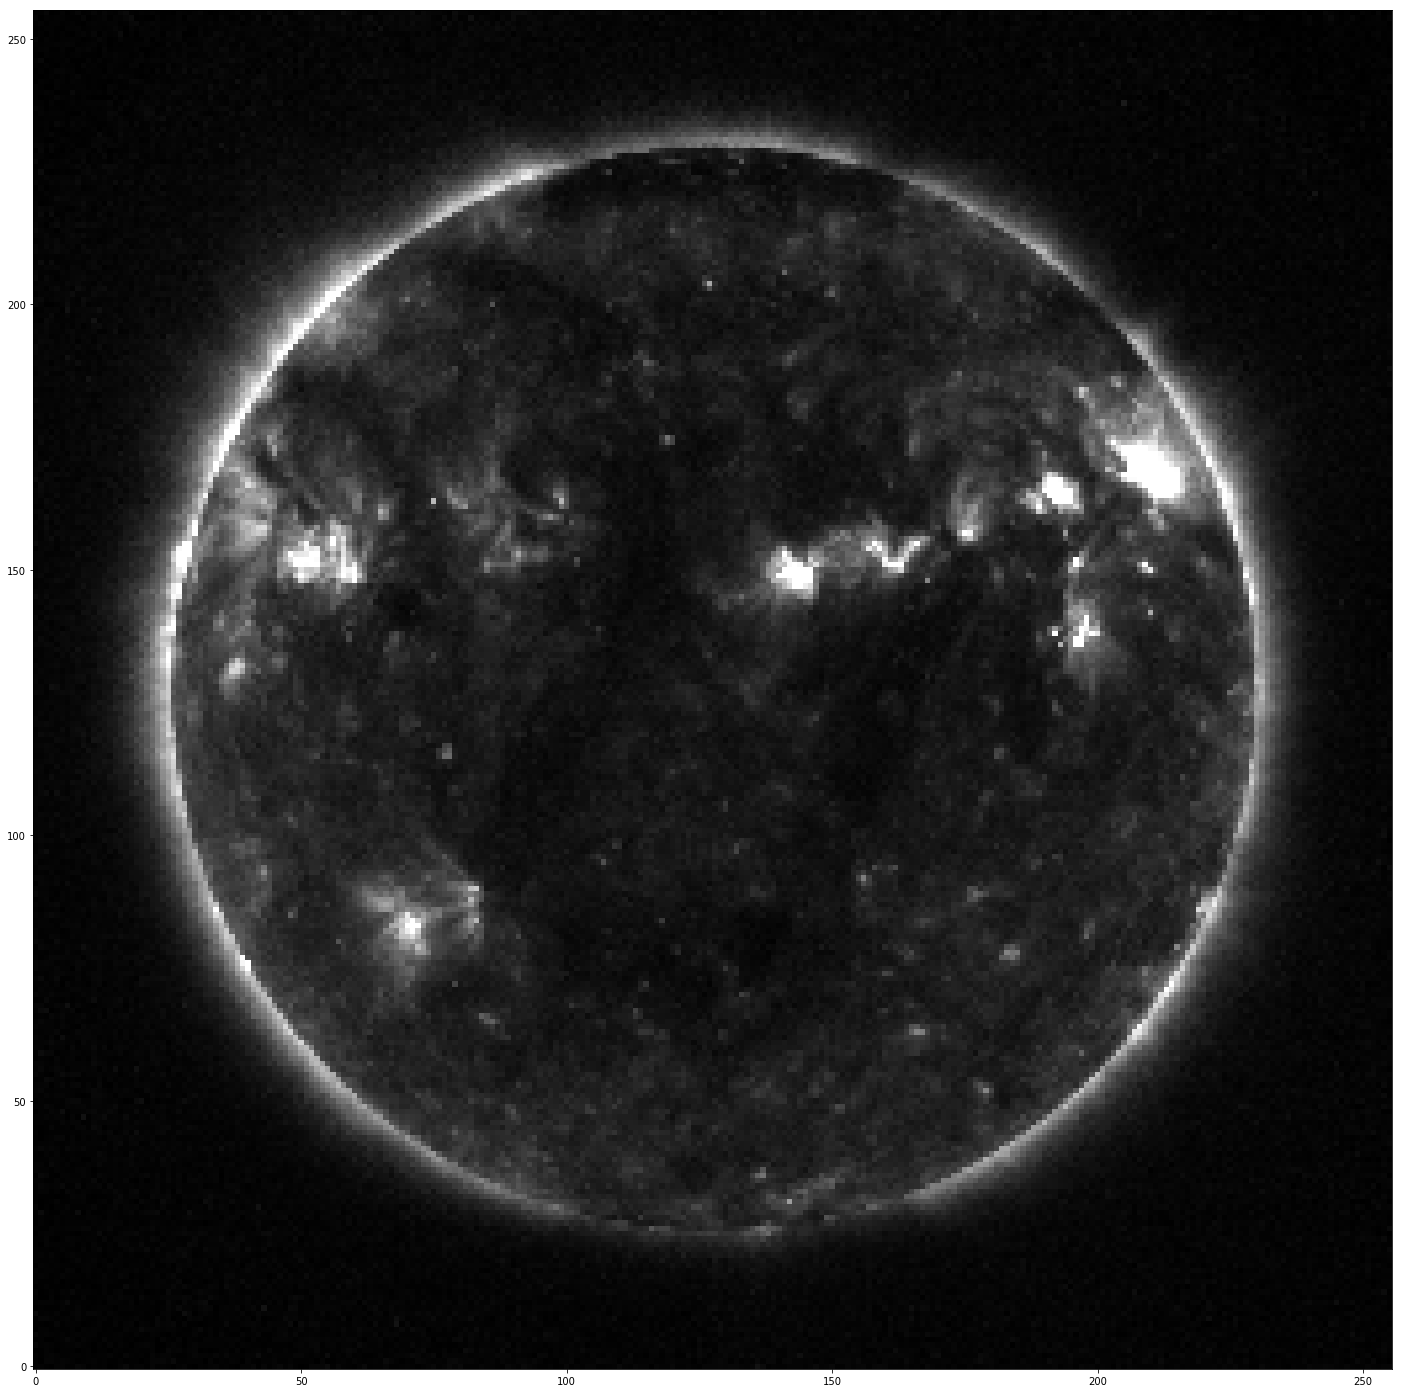

In [2]:
a = sdo_read(2010, 9, 2, 20, 0, subsample=2)
plt.figure(figsize=(25,25))
plt.imshow(a,cmap='gray',clim=(0,20),origin='lower')

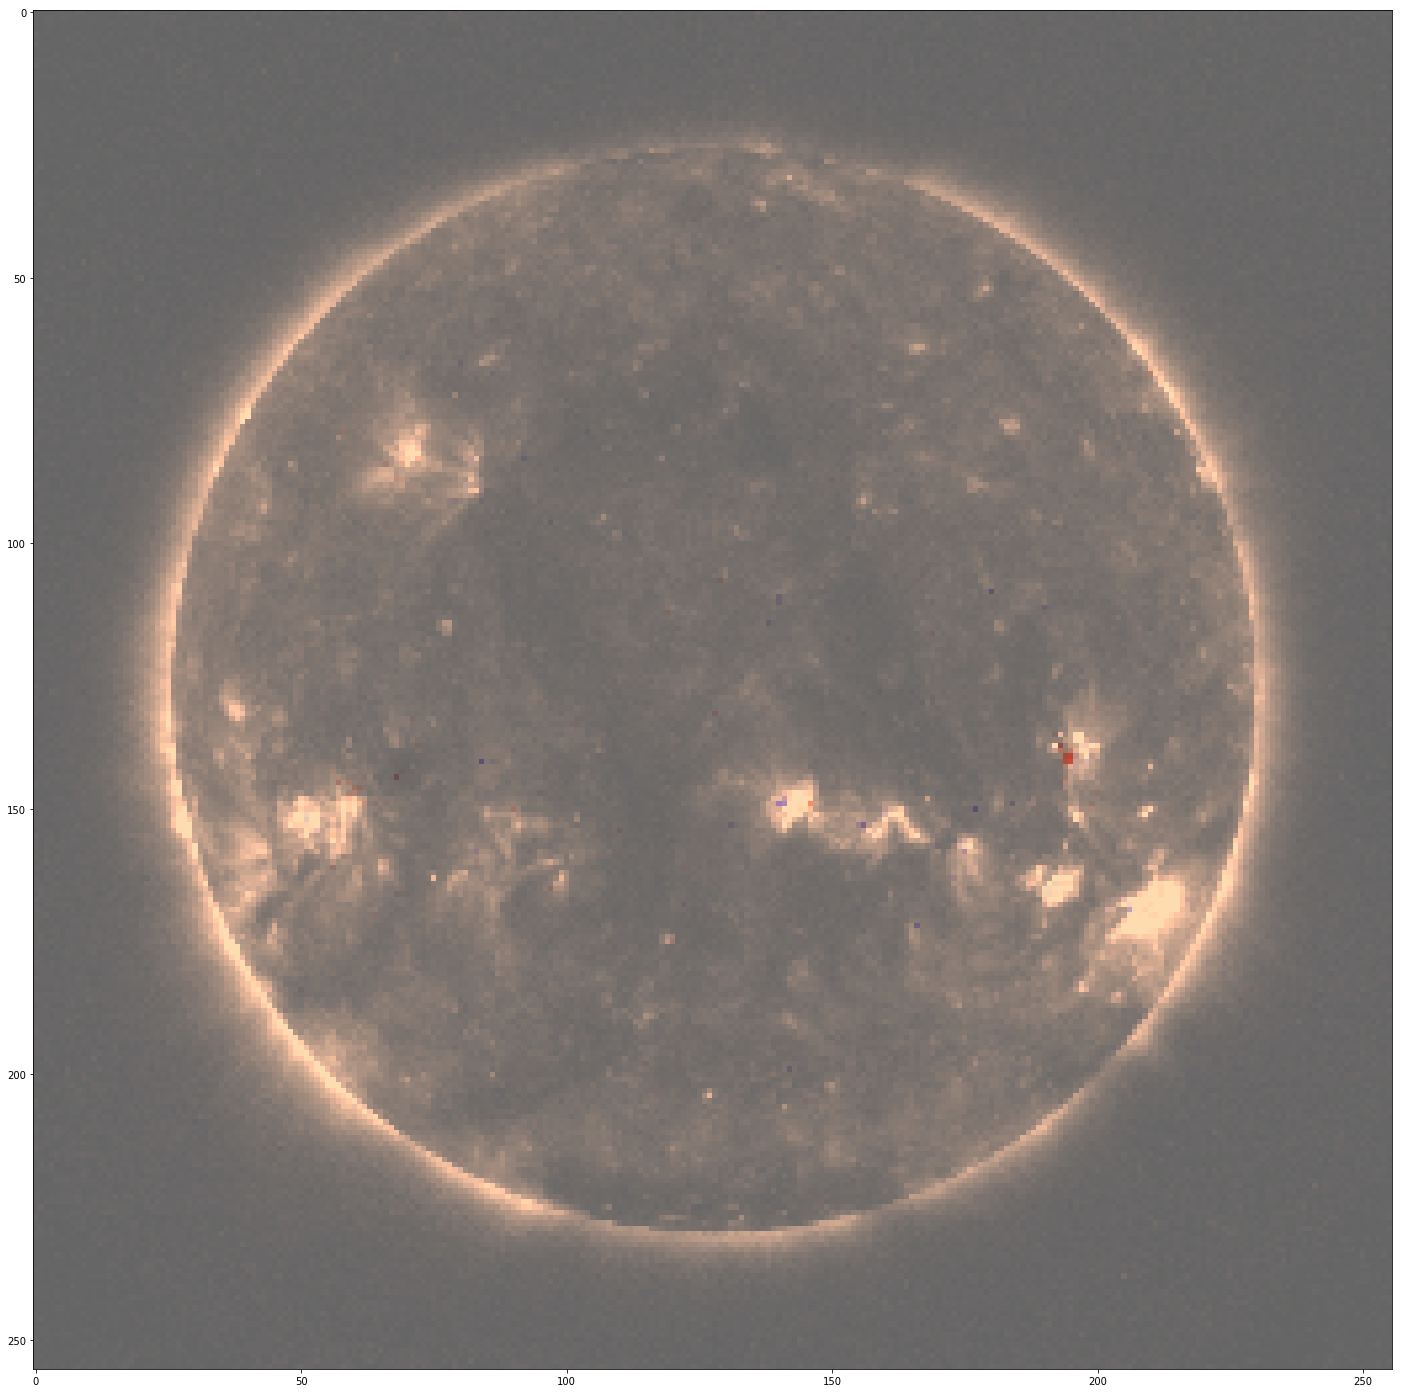

In [3]:
b = sdo_read(2010, 9, 2, 20, 0, instr='HMI', channel='bz', subsample=2)
plt.figure(figsize=(25,25))
plt.imshow(b,cmap='seismic_r',clim=(-3000,3000),origin='lower')
plt.imshow(a,alpha=0.6,cmap=plt.cm.copper,clim=(0,20))

In [5]:
rfiles = glob.glob("/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/201[1-4]/*/*/*1100_0193.npz")
print(len(rfiles))
gfiles = glob.glob("/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/201[1-4]/*/*/*1100_0211.npz")
print(len(gfiles))
bfiles = glob.glob("/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/201[1-4]/*/*/*1100_0171.npz")
print(len(bfiles))

1172
1172
1170


In [26]:
def sdo_read(year, month, day, hour, min, instr='AIA', channels=['0171','0193','0211'],subsample=1,basedir='/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML'):
    """
    Parameters:
    year / month / day - a date between May 17 2010 to 12/31/2018
    hour - between 0 and 23
    min - between 0 and 59 (note AIA data is at 6 min cadence, HMI at 12 min cadence)
    instr - 'AIA' or 'HMI'
    channel - 
       if instr=='AIA', channel should be one of '0094', '0131', '0171', '0193', '0211', '0304', '0335', '1600', '1700'
       if instr=='HMI', channel should be one of 'bx', 'by', 'bz' (last is the line-of-sight component of the magnetic field)
    subsample - return image with every subsample-th pixel in both dimensions
    basedir - directory where the SDO data set is stored.
    """
    from os import path
    from numpy import load
    files_exist = True
    files = []
    img = np.zeros(shape=(3,int(512/subsample),int(512/subsample)))
    ind = 0
    for ch in channels:
        files.append('{0:s}/{1:04d}/{2:02d}/{3:02d}/{4:s}{5:04d}{6:02d}{7:02d}_{8:02d}{9:02d}_{10:s}.npz'.format(basedir,year,month,day,instr,year,month,day,hour,min,ch))
        files_exist = files_exist*path.isfile(files[-1])
        #if files_exist:
        #    img[ind,:,:] = load(files[-1])['x'][::subsample,::subsample]
        #ind = ind+1
    if files_exist:
        return files
#    return img
    else:
        return -1
        #if path.isfile(file):
        #return ((load(file))['x'])[::subsample,::subsample]
    #print('{0:s} is missing'.format(file))
    #return -1

In [28]:
files = sdo_read(2011, 12, 3, 12, 0, instr='AIA')
files[1
     ]

'/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/12/03/AIA20111203_1200_0171.npz'

In [25]:
files = []
for y in np.arange(2011,2012):
    for m in np.arange(1,13):
        for d in np.arange(1,32):
            files.append(sdo_read(y,m,d,10,0,instr='AIA'))
files

[['/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/01/AIA20110101_1000_0171.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/01/AIA20110101_1000_0193.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/01/AIA20110101_1000_0211.npz'],
 ['/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/02/AIA20110102_1000_0171.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/02/AIA20110102_1000_0193.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/02/AIA20110102_1000_0211.npz'],
 ['/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/03/AIA20110103_1000_0171.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/03/AIA20110103_1000_0193.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/03/AIA20110103_1000_0211.npz'],
 ['/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/04/AIA20110104_1000_0171.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/04/AIA20110104_1000_0193.npz',
  '/gpfs/gpfs_gl4_16mb/b9p111/fdl_sw/SDOML/2011/01/04/AIA20110104_1000_0211.npz'],
 ['/gpfs/gpf

In [10]:
import PIL.Image
image = PIL.Image.open('/gpfs/gpfs_gl4_16mb/b9p111/b9p111ai/repos/stylegan/results/example.png')

In [21]:
bx = sdo_read(2011,2,14,23,0,instr='HMI',channel='bx',subsample=2)
by = sdo_read(2011,2,14,23,0,instr='HMI',channel='by',subsample=2)
bz = sdo_read(2011,2,14,23,0,instr='HMI',channel='bz',subsample=2)
bx.min(), bx.max(), by.min(), by.max(), bz.min(), bz.max()


(-1519.327, 1484.4103, -1361.1367, 1425.7681, -2205.91, 2014.4694)

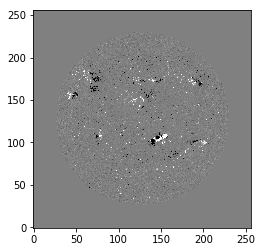

In [26]:
plt.imshow(bz, cmap='gray',clim=(-100,100),origin='lower')

In [ ]:
image.